averave hours = sunshine duration    4.665484
dtype: float64


/Users/hiro/.pyenv/versions/3.10.2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Text(0, 0.5, 'days')

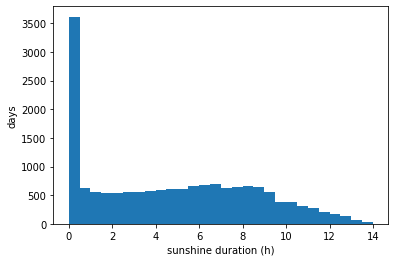

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('data_1977_2021.csv', names=['date','sunshine duration'], sep=',', usecols=[0,1])

x=data[['date']]
y=data[['sunshine duration']]

print("averave hours = "+str(np.mean(y)))
plt.hist(y, range=(0,14), bins=28)
plt.xlabel("sunshine duration (h)")
plt.ylabel("days")

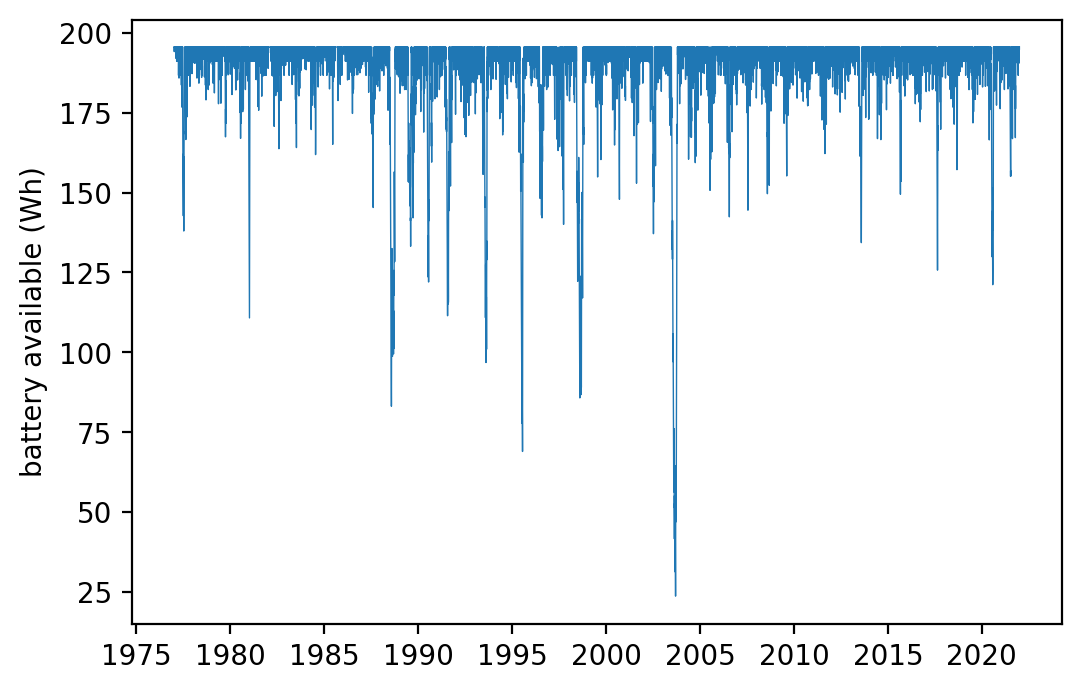

In [118]:
# This simulation is not considering energy loss inside battery and through wires
data = pd.read_csv('data_1977_2021.csv', names=['date','sunshine duration'], sep=',', usecols=[0,1])
data['date'] = pd.to_datetime(data['date'])

battery_capacity = 200 # Wh
battery_availavle = 200 # This is starting battery capacity
enegy_consumption_working = 0.35 # W (when ESP is working)
enegy_consumption_sleep = 0.02 # W (when ESP is sleeping)
enegy_consumption_per_day = enegy_consumption_working*12 + enegy_consumption_sleep*12 # Wh
solar_panel_size = 144*2 #cm**2
energy_generation = 1 * (solar_panel_size/144) # W
data['battery_available'] = 0

for index, row in data.iterrows():
    battery_availavle = min(battery_capacity, battery_availavle + energy_generation*row['sunshine duration'])
    battery_availavle = battery_availavle - enegy_consumption_per_day
    data.at[index,'battery_available'] = battery_availavle

x = data[['date']] 
y = data[['sunshine duration']] 
z = data[['battery_available']]

plt.figure(dpi=200)
plt.plot(x,z, lw='0.5')
plt.ylabel("battery available (Wh)")
plt.show()